In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import pandas as pd
from bayesian.train_bn import structure_learning, parameter_learning
from preprocess.discretization import get_nodes_type, discretization, inverse_discretization
from visualization.visualization import draw_BN

In [3]:
vk = pd.read_csv('../datasets/vk_interests_finance.csv')
vk.head(10)

,first_name,last_name,sex,age,city_id,has_high_education,relation,num_of_relatives,followers_count,status,...,top3,top3_mean,game_sum,is_gamer,parent_sum,is_parent,driver_sum,is_driver,pets_sum,has_pets
0,Darya,Tsiberkina,1.0,33,2,0,4,2,486,8,...,5812,1277.784568,0.0,0,9968.00,1,0.0,0,0.0,0
1,Gleb,Kotenev,2.0,18,2,0,0,2,0,5,...,5814,384.000000,0.0,0,0.00,0,0.0,0,0.0,0
2,Anna,Pavlova,1.0,34,2,0,0,2,7,0,...,6011,24000.000000,0.0,0,0.00,0,0.0,0,0.0,0
3,Serega,Martynov,2.0,39,2,0,0,2,7,10,...,5411,142.175000,0.0,0,0.00,0,0.0,0,0.0,0
4,Maria,Pavlyukova,1.0,0,2,0,0,2,144,0,...,6011,1095.238095,0.0,0,60331.59,1,0.0,0,80.0,0
5,Yury,Golubkov,2.0,47,2,0,0,2,0,0,...,5964,760.580000,0.0,0,0.00,0,0.0,0,0.0,0
6,Svetlana,Muratova,1.0,48,2,0,4,2,30,0,...,5411,113.000000,0.0,0,0.00,0,0.0,0,0.0,0
7,Ivan,Poletaev,2.0,0,2,0,0,2,53,23,...,5411,446.565263,1000.0,1,0.00,0,0.0,0,0.0,0
8,Anastasia,Yaguzhinskaya,1.0,25,1,0,0,2,111,3,...,5499,185.523529,0.0,0,0.00,0,0.0,0,1287.0,0
9,Valentina,Trokhova,1.0,55,2,0,0,12,56,0,...,5499,345.572472,0.0,0,0.00,0,0.0,0,0.0,0


In [4]:
vk.columns

Index(['first_name', 'last_name', 'sex', 'age', 'city_id',
       'has_high_education', 'relation', 'num_of_relatives', 'followers_count',
       'status', 'mobile_phone', 'twitter', 'facebook', 'instagram', 'about',
       'about_topic', 'activities', 'activities_topic', 'books', 'interests',
       'interests_topic', 'movies', 'music', 'quotes', 'personal_alcohol',
       'personal_life_main', 'personal_people_main', 'personal_political',
       'платье размер наличие цвет', 'массаж тело   йога',
       'игра команда место', 'цвет цветок букет интерьер',
       'iphone apple торт набор pro чехол',
       'клиент который проект интернет бизнес', 'год война время ссср армия',
       'волос маникюр   ресница', 'handmade ряд ручнаяработа что петля лицо',
       'работа год график день', 'концерт билет музыка рок группа',
       'лечение заболевание кровь врач болезнь',
       'школа искать год вопрос тема', 'кожа лицо масло волос',
       'книга язык слово', 'санкт петербург участие фест

In [5]:
vk = vk[['age', 'sex', 'relation', 'mean_tr', 'median_tr', 'tr_per_month', 'is_driver', 'is_parent', 'has_pets']]

In [6]:
vk['sex'] = vk['sex'].apply(lambda x: int(x))

In [7]:
nodes_type = get_nodes_type(vk)
nodes_type

{'age': 'disc',
 'sex': 'disc',
 'relation': 'disc',
 'mean_tr': 'cont',
 'median_tr': 'cont',
 'tr_per_month': 'cont',
 'is_driver': 'disc',
 'is_parent': 'disc',
 'has_pets': 'disc'}

In [8]:
vk.dropna(inplace=True)
vk.reset_index(inplace=True, drop=True)

In [9]:
vk_discrete, vk_coder = discretization(vk, 'equal_frequency', ['mean_tr', 'median_tr', 'tr_per_month'])

In [10]:
vk_discrete

,age,sex,relation,mean_tr,median_tr,tr_per_month,is_driver,is_parent,has_pets
0,33,1,4,2,2,4,0,1,0
1,18,2,0,0,0,2,0,0,0
2,34,1,0,3,4,0,0,0,0
3,39,2,0,4,2,2,0,0,0
4,0,1,0,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...
93613,20,2,0,0,0,0,0,0,0
93614,47,1,0,3,3,4,0,1,0
93615,57,1,0,4,4,0,0,0,0
93616,58,2,4,4,3,1,0,1,0


In [11]:
bn = structure_learning(vk_discrete, 'K2', nodes_type)

  0%|          | 21/1000000 [00:03<44:05:58,  6.30it/s]


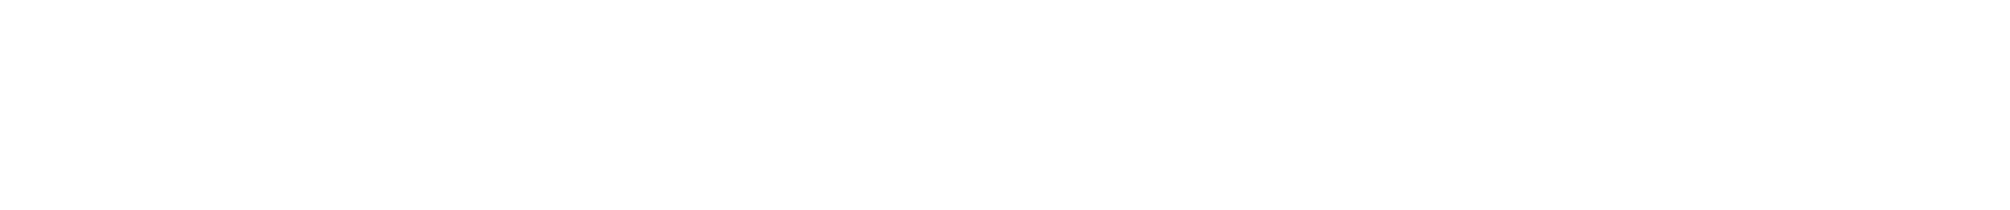

In [12]:
draw_BN(bn, nodes_type, 'vk_net')